HPA_KF
POTデータの範囲 15.12 ~ 35.22 POTデータ数: 141
最大尤度: 2.4606084320926795e-29
最尤推定 ξ: -0.40703517587939697 σ: 8.673985352912762 RV: 34.81269704620363
HFA_KF_c0
POTデータの範囲 15.05 ~ 35.11 POTデータ数: 120
最大尤度: 5.3525664391308254e-33
最尤推定 ξ: -0.542713567839196 σ: 11.579577182262721 RV: 35.63804986472977
HPA_YS
POTデータの範囲 15.15 ~ 29.44 POTデータ数: 91
最大尤度: 3.180201008938189e-09
最尤推定 ξ: -0.4321608040201005 σ: 6.9313338953641885 RV: 29.93423901336559
HFA_YS_c0
POTデータの範囲 15.01 ~ 31.85 POTデータ数: 83
最大尤度: 7.917780002253264e-12
最尤推定 ξ: -0.3517587939698492 σ: 7.0546075994224235 RV: 32.46211598805645


/Users/naoto/grib/STM/func.py:142: RuntimeWarning: invalid value encountered in double_scalars
  rv = thr + s * ((100 * 365 * 24 * n0 / n) ** x - 1) / x


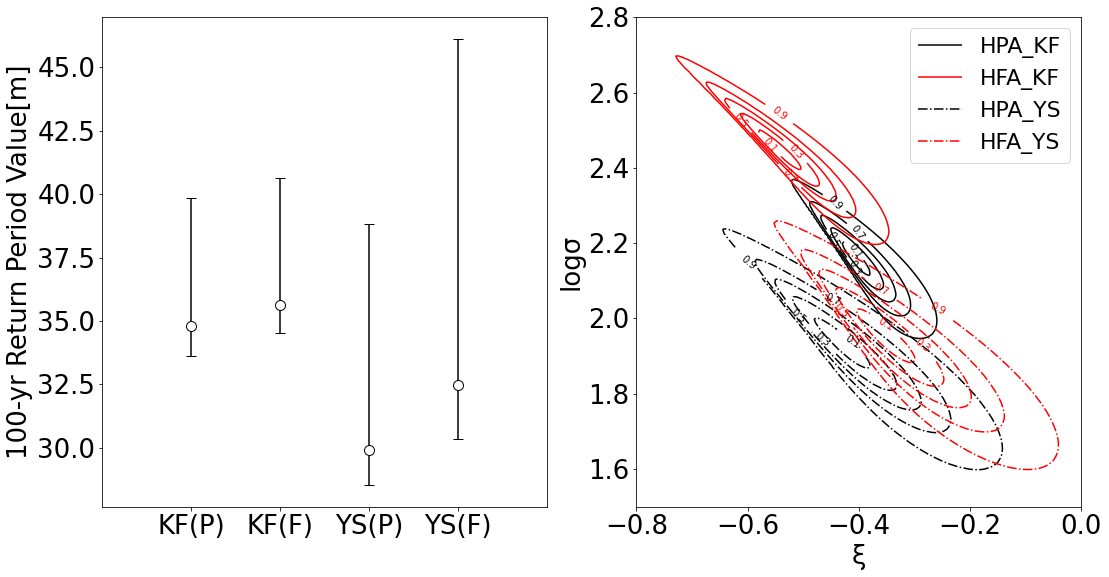

In [5]:
"""
それぞれのモデルのイベントごとのSTMの100yRVを算出する.
"""

from csv import reader
import matplotlib.pyplot as plt
import numpy as np
import func
import math

MODEL = ['KF', 'YS']
RV = []
PARAM = []

for model_num in range(len(MODEL)):
    for num in range(2):
        model = MODEL[model_num]
        if num == 0:
            model = 'HPA_' + model
        else:
            model = 'HFA_' + model + '_c0'

        print(model)

        with open('../Ex_csv/' + model + '_STM.csv', 'r') as csv_file:
            csv_reader = reader(csv_file)
            STM = list(csv_reader)
        
        POT_DATA = sorted([float(s[0]) for s in STM], reverse=True)

        print('POTデータの範囲', POT_DATA[-1], '~', POT_DATA[0], 'POTデータ数:', len(POT_DATA))
        
        rv, param = func.lwm_gpd(data=POT_DATA, error=[0.005], thr=POT_DATA[-1], n=219143, n0=len(POT_DATA), con=0.95)
        RV.append(rv)
        PARAM.append(param)


fig1 = plt.figure(figsize=(16, 8))
ax1 = fig1.add_subplot(1, 2, 1)
ax2 = fig1.add_subplot(1, 2, 2)
# RVの描画
a = ax1.errorbar(
    x=[1, 2, 3, 4],
    y=[RV[0][1], RV[1][1], RV[2][1], RV[3][1]],
    yerr=np.array(
        [
            [RV[0][1] - RV[0][0], RV[1][1] - RV[1][0], RV[2][1] - RV[2][0], RV[3][1] - RV[3][0]],
            [RV[0][2] - RV[0][1], RV[1][2] - RV[1][1], RV[2][2] - RV[2][1], RV[3][2] - RV[3][1]]
        ]
    ),
    capsize=5,
    fmt='o',
    markersize=10,
    ecolor='black',
    markeredgecolor='black',
    color='w'
)
ax1.set_xlim((0, 5))
ax1.set_xticks([1, 2, 3, 4])
ax1.set_xticklabels(['KF(P)', 'KF(F)', 'YS(P)', 'YS(F)'], fontsize=26)
ax1.set_ylabel('100-yr Return Period Value[m]', fontsize=26)
ax1.tick_params(axis='y', labelsize=26)

# パラメータ等高線の描画
for i in range(4):
    p = PARAM[i]
    xi, sgm, sum_prob = p
    log_sgm = [math.log(s) for s in sgm]
    X, Y = np.meshgrid(xi, log_sgm)
    Z = np.array([[sum_prob[i, j] for i in range(200)] for j in range(200)])
    if i == 0:  
        cntr = ax2.contour(X, Y, Z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors='black')
        h0,_ = cntr.legend_elements()
        ax2.clabel(cntr)
    if i == 1:
        cntr = ax2.contour(X, Y, Z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors='red')
        h1,_ = cntr.legend_elements()
        ax2.clabel(cntr)
    if i == 2:
        cntr = ax2.contour(X, Y, Z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors='black', linestyles='dashdot')
        h2,_ = cntr.legend_elements()
        ax2.clabel(cntr)
    if i == 3:
        cntr = ax2.contour(X, Y, Z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors='red', linestyles='dashdot')
        h3,_ = cntr.legend_elements()
        ax2.clabel(cntr)
ax2.legend([h0[0], h1[0], h2[0], h3[0]], ['HPA_KF', 'HFA_KF', 'HPA_YS', 'HFA_YS'], fontsize=22)
ax2.set_xlim((-0.8, 0))
ax2.set_ylim((1.5, 2.8))
ax2.set_xlabel("ξ", fontsize=26)
ax2.set_ylabel("logσ", fontsize=26)
ax2.tick_params(axis='x', labelsize=26)
ax2.tick_params(axis='y', labelsize=26)

fig1.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95) #この1行を入れる
plt.savefig("../img/100y-rv_of_stm.png")
plt.show()